In [8]:
import matplotlib.pylab as plt
import os
from IPython.display import Image
from sklearn import cluster
import pandas as pd
from sklearn.cluster import KMeans
#from sklearn.mixture import GaussianMixture
%pylab inline

cwd = os.getcwd()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
%run ../py/read_data.py
%run ../py/clustering_ch.py
%run ../py/pixel_image_projection.py

In [3]:
res5 = get_res(5)
timer = range(res5[0].shape[0])

In [5]:
def get_frame(number):
    '''
    read in frame of a time in (0, 708)
    number = int()
    e.g: get_frame(450)
    '''
    cwd = os.getcwd()

    framename = 'frame_{}.png'.format(number)
    cwd_frame = os.path.join(dirname(dirname(cwd)),'data', 'gf_frame_0403_1_5', framename)
    display(Image(filename = cwd_frame))

threshold = {}
i = res5
# choose a frame in the middle of time 354

temp_frame = res5[: , 354]
std = temp_frame.std()
mean = temp_frame.mean()
# creating a threshold for 3 std
threshold[5] = (mean - 3 * std, mean + 3 * std)

In [6]:
res5_ = transferback(res5)
res5_.shape

(708, 720, 968)

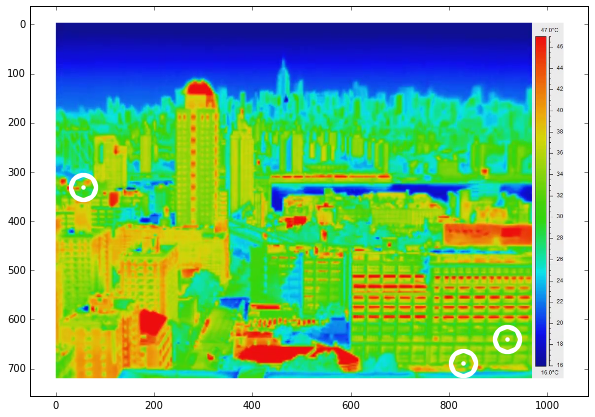

In [9]:
# plot out a singel frame
IRTL_frame_400_path = os.path.join(dirname(dirname(cwd)), 'data', 'IRTL_frames', 'IRTL_frame_0400.npy')
frame = np.load(IRTL_frame_400_path)
plt.figure(figsize = [10,10])
plt.imshow(frame)

## Now choose several specific nodes in the frame to test our result:
node = np.array([[829, 689], [919,639], [56,331]])
plt.scatter(node.T[0], node.T[1], color = 'w', linewidths=25)

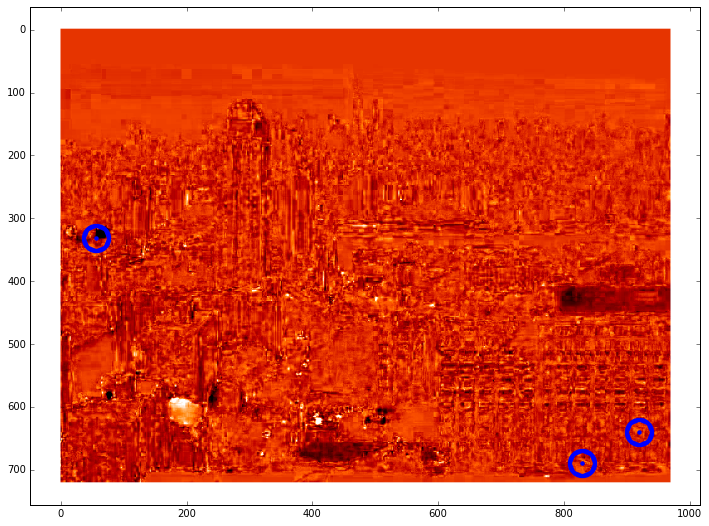

In [10]:
# and on our GF results: (time = 343)
plt.figure(figsize = [12,12])
plt.imshow(res5_[343,:,:], cmap = 'gist_heat', vmin = threshold[5][0], vmax = threshold[5][1])
plt.scatter(node.T[0], node.T[1], color = 'B', linewidths=25)

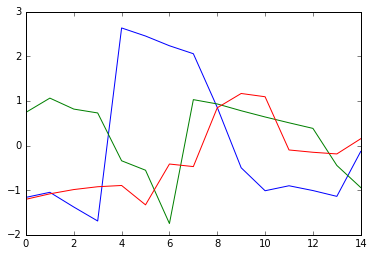

In [12]:
# for single nodes, plot out values of observed major changes in image:
plt.plot(range(15), res5_[381:381+15, 689, 829])
plt.plot(range(15), res5_[395:395+15, 639, 919])
plt.plot(range(15), res5_[424:439, 331, 56])

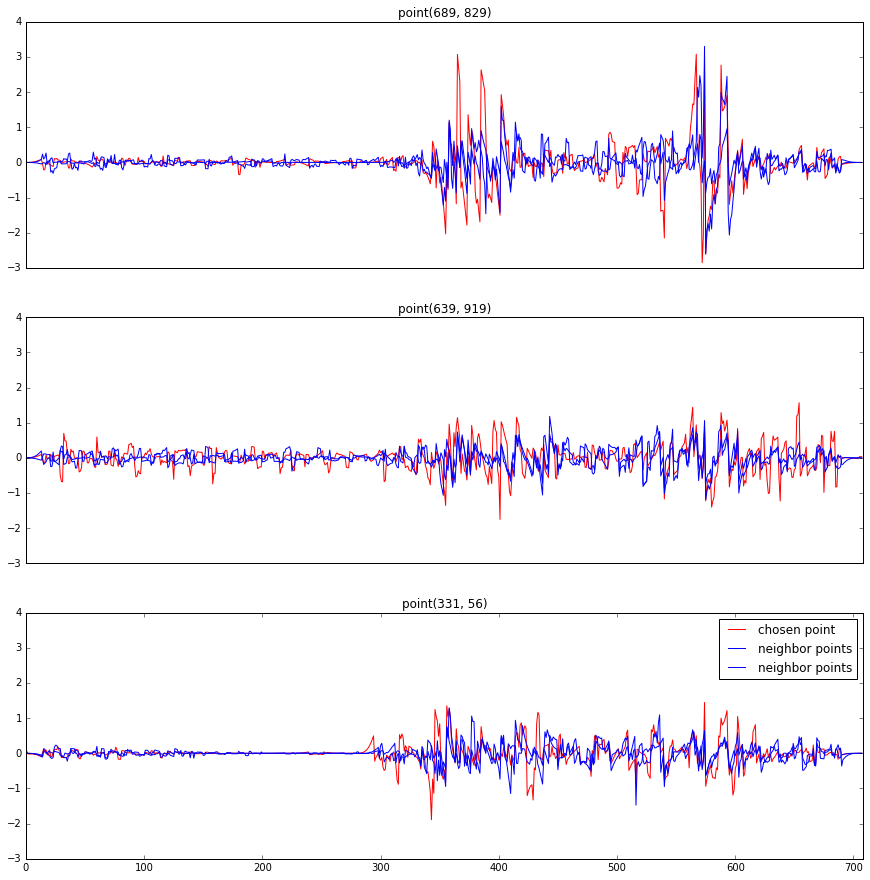

In [14]:
# if we plot them out with their neighbors:
plt.figure(figsize = [15,15])

plt.subplot(311)
plt.plot(timer, res5_[:, 689, 829], c = 'r')
plt.plot(timer, res5_[:, [689-10, 689+10], [829-10, 829+10]], c = 'b')
plt.title('point(689, 829)')
plt.ylim([-3,4])
plt.xlim([0, 708])
plt.xticks([])

plt.subplot(312)
plt.plot(timer, res5_[:, 639, 919], c = 'r')
plt.plot(timer, res5_[:, [639-10, 639+10], [919-10, 919+10]], c = 'b')
plt.ylim([-3,4])
plt.xlim([0, 708])
plt.title('point(639, 919)')
plt.xticks([])

plt.subplot(313)
plt.plot(timer, res5_[:, 331, 56], c = 'r', label = 'chosen point')
plt.plot(timer, res5_[:, [331-10, 331+10], [56-10, 56+10]], c = 'b', label = 'neighbor points')
plt.legend(loc = 0)
plt.ylim([-3,4])
plt.xlim([0, 708])
plt.title('point(331, 56)')

## We can actually observe distinguish changes in certain areas over time:

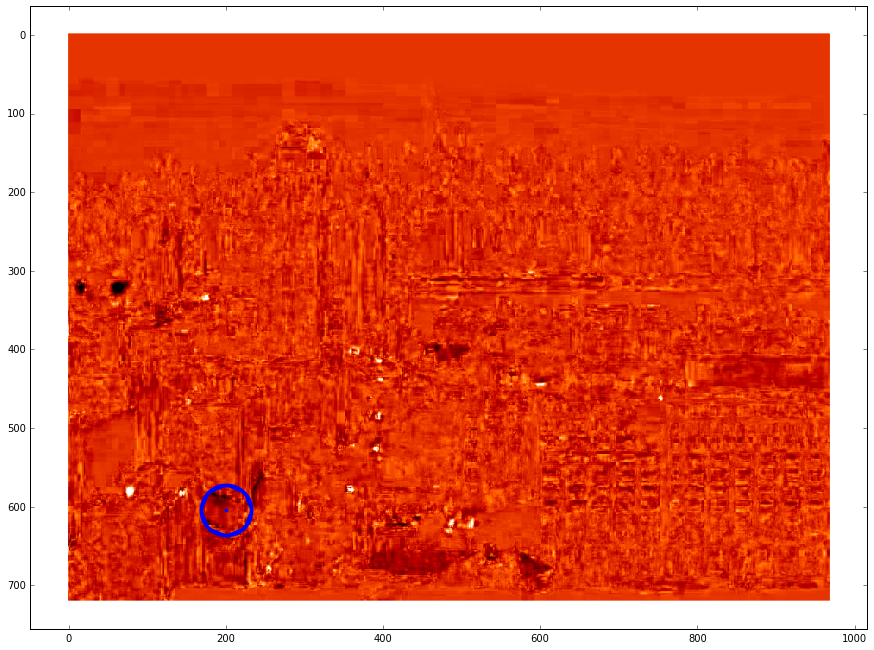

In [16]:
# 1st of choice
# seems like a building roof
plt.figure(figsize = [15,15])
plt.imshow(res5_[340,::], cmap = 'gist_heat', vmin = threshold[5][0], vmax = threshold[5][1])
plt.scatter(200,605, s = 15, linewidths=50, color = 'B')

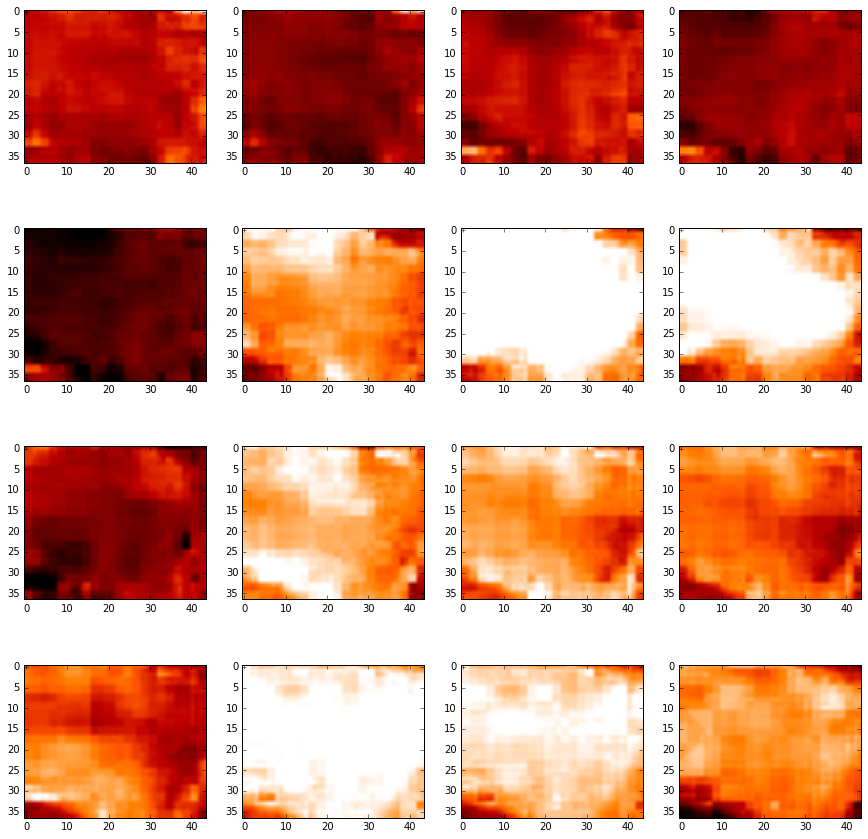

In [17]:
# plot out certain areas over time
fig = plt.figure(figsize = [15,15])
for i in range(16):
    fig.add_subplot(4,4,i+1)
    plt.imshow(res5_[338+i,591:628,176:220], cmap = 'gist_heat', vmin = threshold[5][0], vmax = threshold[5][1])

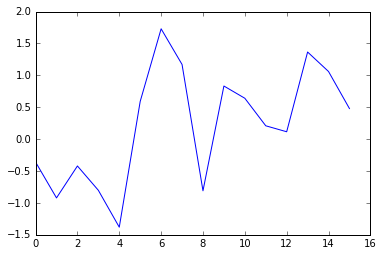

In [18]:
# take an average over the area and plot them out over selected time:
area1_ave = res5_[:
                  ,591:628,176:220].mean(axis = 1).mean(axis = 1)

plt.plot(range(16), area1_ave[338:338+16])

([], <a list of 0 Text xticklabel objects>)

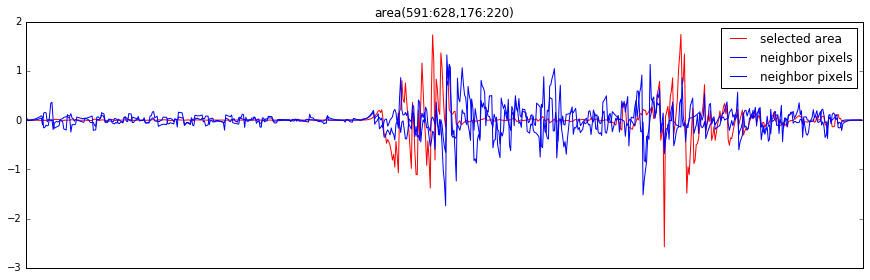

In [19]:
# if we plot out value average in the area with their neighbor pixels:
plt.figure(figsize = [15,15])

plt.subplot(311)
plt.plot(timer, area1_ave, c = 'r', label = 'selected area')
plt.plot(timer, res5_[:, [591-20, 628+20], [176-20, 220+20]], c = 'b', label = 'neighbor pixels')
plt.title('area(591:628,176:220)')
plt.ylim([-3,2])
plt.xlim([0, 708])
plt.legend(loc = 0)
plt.xticks([])

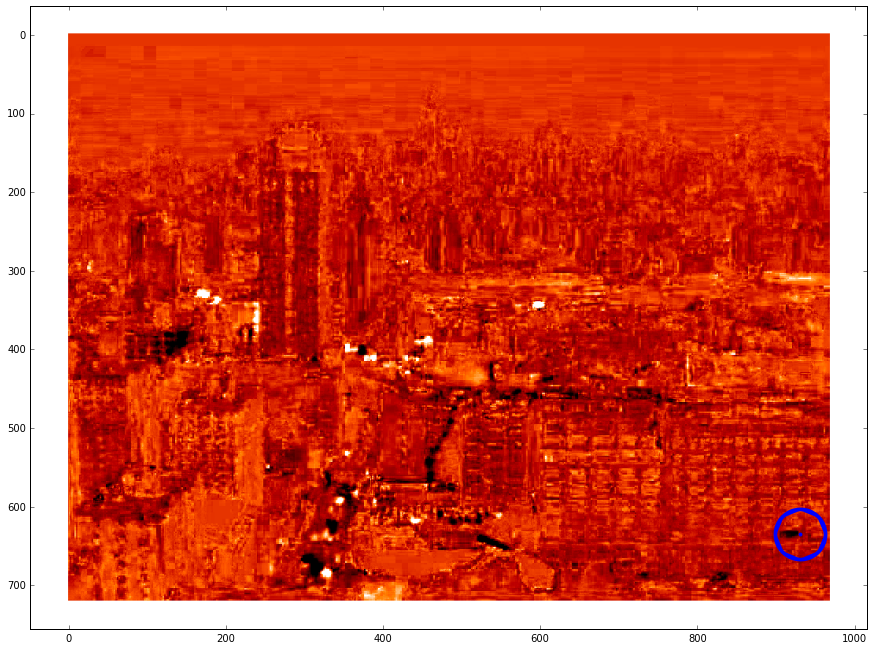

In [21]:
# 2nd of choice
# seems like two windows of the lower right building
plt.figure(figsize = [15,15])
plt.imshow(res5_[401,::], cmap = 'gist_heat', vmin = threshold[5][0], vmax = threshold[5][1])
plt.scatter(930,635, s = 15, linewidths=50, color = 'B')

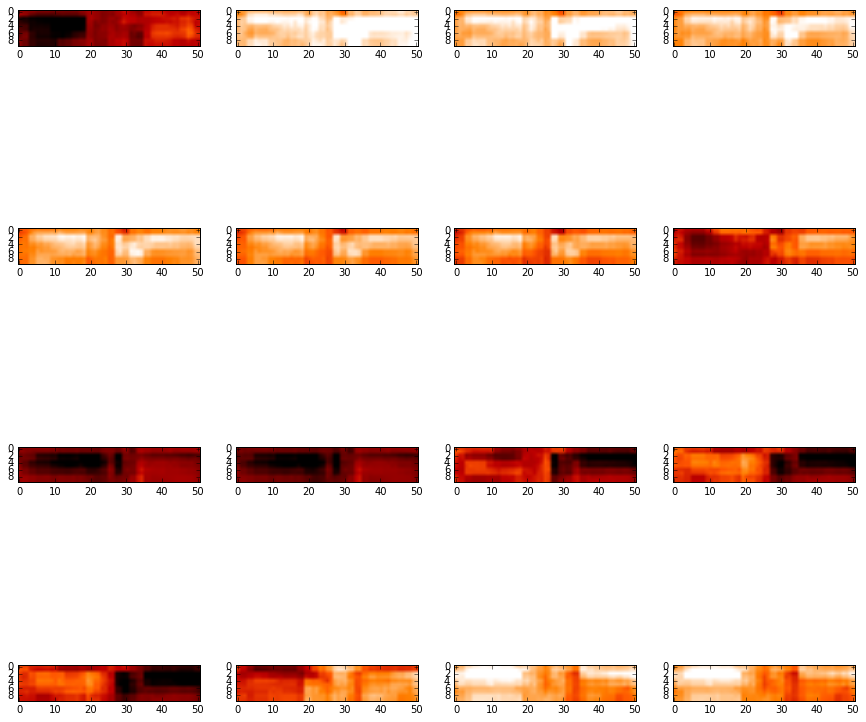

In [22]:
fig = plt.figure(figsize = [15,15])
for i in range(16):
    fig.add_subplot(4,4,i+1)
    plt.imshow(res5_[401+i,630:640,909:960], cmap = 'gist_heat', vmin = threshold[5][0], vmax = threshold[5][1])

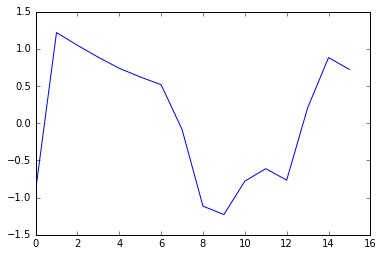

In [23]:
# take an average over the area and plot them out over selected time:
area1_ave_1 = res5_[:
                  ,630:640,909:960].mean(axis = 1).mean(axis = 1)
plt.plot(range(16), area1_ave_1[401:401+16])

([], <a list of 0 Text xticklabel objects>)

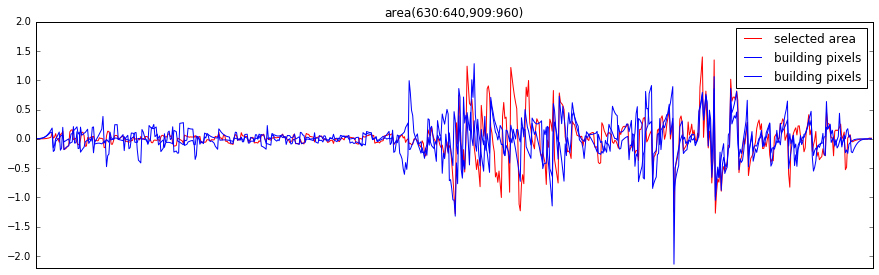

In [24]:
plt.figure(figsize = [15,15])

plt.subplot(311)
plt.plot(timer, area1_ave_1, c = 'r', label = 'selected area')
plt.plot(timer, res5_[:, [519, 608], [603, 956]], c = 'b', label = 'building pixels')
plt.title('area(630:640,909:960)')
plt.ylim([-2.2,2])
plt.xlim([0, 708])
plt.legend(loc = 0)
plt.xticks([])

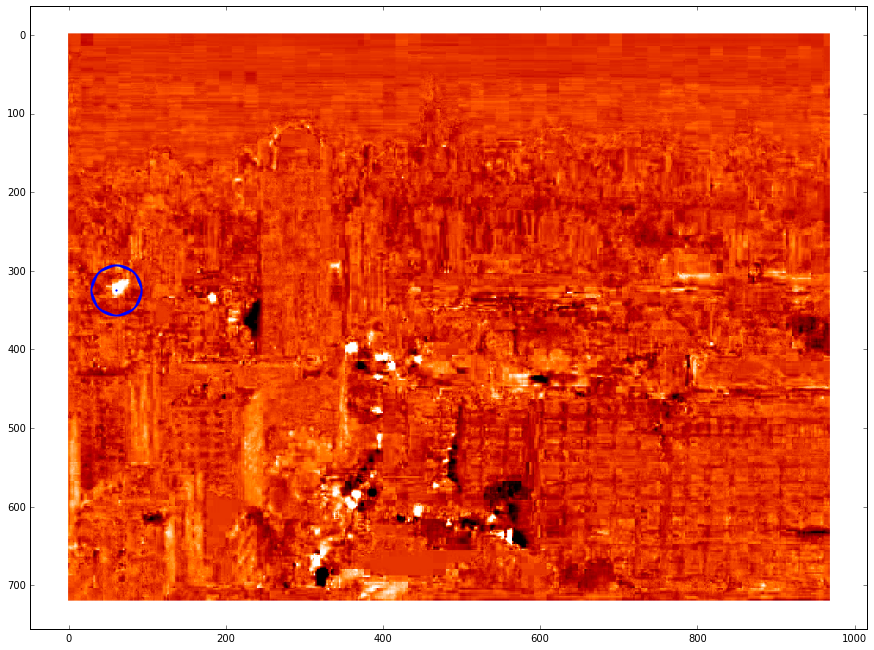

In [26]:
# 3rd of choice
# seems like the roof of a building
plt.figure(figsize = [15,15])
plt.imshow(res5_[417+i,::], cmap = 'gist_heat', vmin = threshold[5][0], vmax = threshold[5][1])
plt.scatter(60,325, s = 5, linewidths=50, color = 'B')

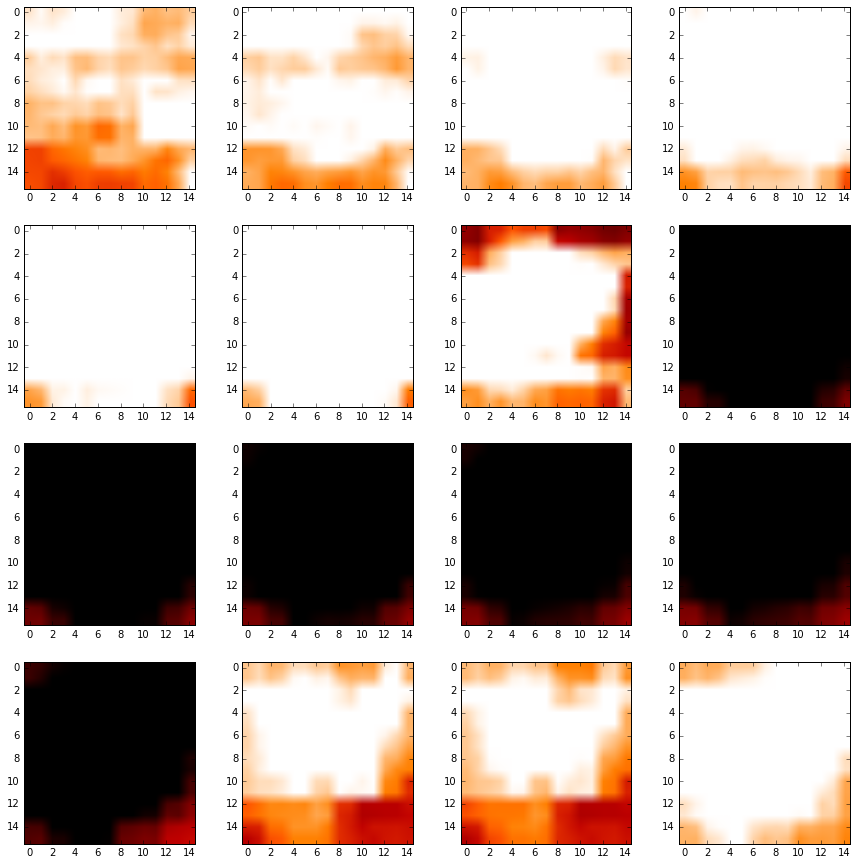

In [28]:
fig = plt.figure(figsize = [15,15])
for i in range(16):
    fig.add_subplot(4,4,i+1)
    plt.imshow(res5_[417+i,316:332,56:71], cmap = 'gist_heat', vmin = threshold[5][0], vmax = threshold[5][1])

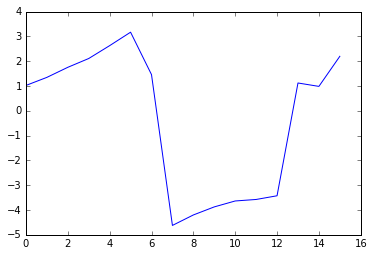

In [29]:
# take an average over the area and plot them out over selected time:
area1_ave_2 = res5_[:
                  ,316:332,56:71].mean(axis = 1).mean(axis = 1)
plt.plot(range(16), area1_ave_2[417:417+16])

([], <a list of 0 Text xticklabel objects>)

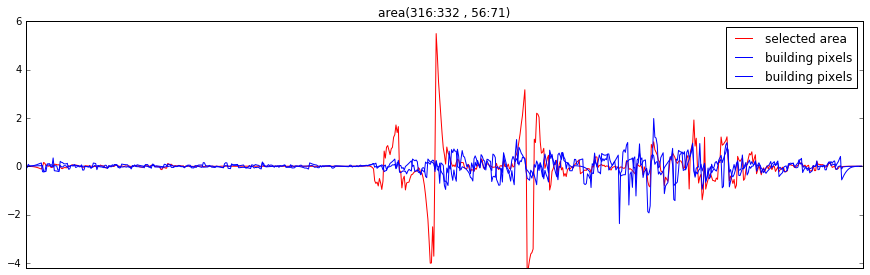

In [30]:
plt.figure(figsize = [15,15])

plt.subplot(311)
plt.plot(timer, area1_ave_2, c = 'r', label = 'selected area')
plt.plot(timer, res5_[:, [316-20, 332+20], [56-20, 56+20]], c = 'b', label = 'building pixels')
plt.title('area(316:332 , 56:71)')
plt.ylim([-4.2, 6])
plt.xlim([0, 708])
plt.legend(loc = 0)
plt.xticks([])